In [3]:
#Librería de graficación
import matplotlib.pyplot as plt
import matplotlib as mp
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import metpy.calc as mpcalc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.gridspec as gsa
import matplotlib.ticker as mticker
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot, transforms



#Librerías de procesamiento matemático y lectura de archivos
import numpy as np
import netCDF4 as nc
import pandas as pd
import glob
import os
from scipy import signal

#Librería de estadística
import scipy as sp
from scipy.stats import pearsonr,spearmanr

#librería para manejo de fechas
from datetime import datetime,timedelta

plt.style.use("seaborn")
mp.rcParams['xtick.labelsize']=15
mp.rcParams['ytick.labelsize']=15

mp.rcParams['axes.labelsize']=17

# Primera parte

# Segunda Parte

In [4]:
def reading_netcdf(ruta):
    data=nc.Dataset(ruta)
    for i in data.variables:
        try:
            print (i,data.variables[i].shape,data.variables[i].units) 
        except:
            print (i,data.variables[i].shape) 
    print("\n")
    data_variables=[np.array(data[i][:]) for i in list(data.variables.keys())]
    return data_variables

In [5]:
rutas = np.sort(glob.glob("/home/franklin/Documentos/GitHub/TDG/Dataset/CMEMS_ECMFW/*.nc"))

#Al estar por años se debe concatenar
for i in range(0,len(rutas)):
    if i==0:
        [adt,time,lat,lon,ugos,vgos,vgosa,sla,ugosa]=reading_netcdf(rutas[i])
    else:
        [adt,time2,lat,lon,ugos,vgos,vgosa,sla2,ugosa]=reading_netcdf(rutas[i])
        sla=np.concatenate((sla,sla2))
        time=np.concatenate((time,time2))

adt (366, 45, 185) m
time (366,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (366, 45, 185) m/s
vgos (366, 45, 185) m/s
vgosa (366, 45, 185) m/s
sla (366, 45, 185) m
ugosa (366, 45, 185) m/s


adt (366, 45, 185) m
time (366,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (366, 45, 185) m/s
vgos (366, 45, 185) m/s
vgosa (366, 45, 185) m/s
sla (366, 45, 185) m
ugosa (366, 45, 185) m/s


adt (366, 45, 185) m
time (366,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (366, 45, 185) m/s
vgos (366, 45, 185) m/s
vgosa (366, 45, 185) m/s
sla (366, 45, 185) m
ugosa (366, 45, 185) m/s


adt (367, 45, 185) m
time (367,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (367, 45, 185) m/s
vgos (367, 45, 185) m/s
vgosa (367, 45, 185) m/s
sla (367, 45, 185) m
ugosa (367, 45, 185) m/s


adt (366, 45, 185) m
tim

Resolución diaria

In [6]:
sla[sla<=-1000]=np.nan
da=[datetime(1950,1,1,0,0,0)+timedelta(days=int(time[w])) for w in range (0,len(time))]
date=pd.DatetimeIndex(da)
new_array = np.array(date.to_pydatetime(), dtype=object)
sla_copy=sla

In [7]:
# for la in range (sla_copy.shape[1]):
#     for lo in range(sla_copy.shape[2]):
#         a=sla_copy[:,la,lo]
#         serie_test=pd.Series(a,index=date)
#         serie_rolling=serie_test.rolling(30).mean()
#         sla_copy[:,la,lo]=serie_rolling.values

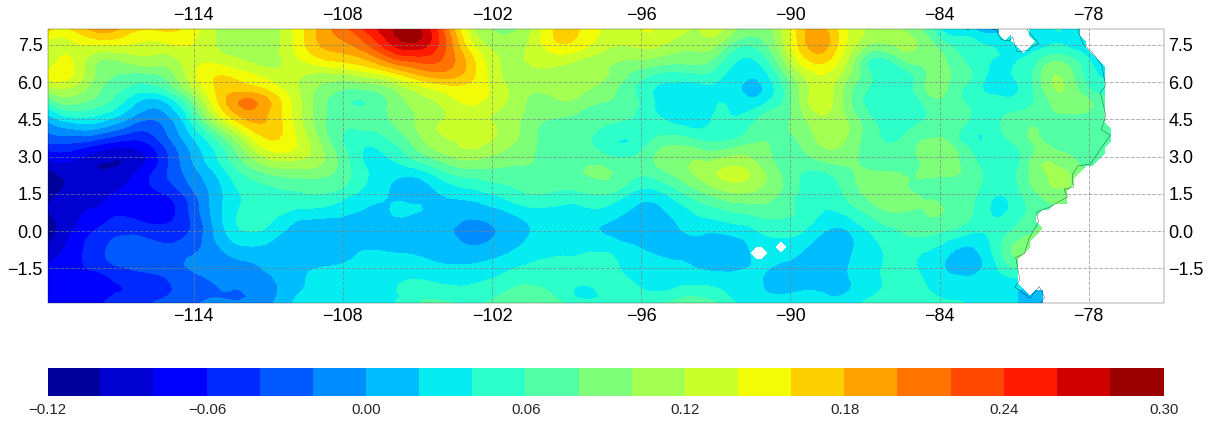

In [8]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection=ccrs.PlateCarree())
x,y=np.meshgrid(lon,lat)
cf=ax.contourf(x,y,sla_copy[2000,:,:],20,transform=ccrs.PlateCarree(),cmap="jet")
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.6, linestyle='--')
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}
ax.coastlines()
cbar=plt.colorbar(cf,orientation="horizontal",fraction=0.1, pad=0.06,aspect=40)
cbar.ax.tick_params(labelsize=15) 

plt.show()

In [9]:
sla_copy.shape

(9289, 45, 185)

In [10]:
A=np.reshape(sla_copy,(len(time),len(lon)*len(lat)))

In [11]:
A_copy=np.copy(A)

In [12]:
idx=[]
for i in range(A_copy.shape[1]):
    if np.isnan(A_copy[:,i]).any()==True:
            idx.append(i)

In [13]:
mat=np.ones((len(time),(len(lon)*len(lat))))*np.nan

In [14]:
verify=np.copy((A_copy[0]))

In [15]:
U,S,Vh=np.linalg.svd(A_fill)

In [15]:
verify

array([0.1207, 0.125 , 0.1291, ...,    nan,    nan,    nan])

In [16]:
iters=0
for i in range(len(verify)):
    if np.isnan(verify[i])==True:
        iters=iters
    if np.isnan(verify[i])==False:
        verify[i]==Vh[0,iters]
        iters=iters+1

NameError: name 'Vh' is not defined

In [68]:
for i in range(A_copy.shape[1]):
    if np.isnan(A_copy[:,i]).any()==False:
        A_copy[:,i]=Vh[0,i]


(array([], dtype=int64), array([], dtype=int64))

In [14]:
A_fill=np.delete(A,idx,1)

Text(0, 0.5, 'Porcentaje de varianza')

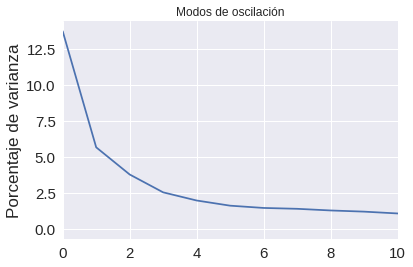

In [24]:
plt.figure()
plt.plot((S/np.sum(S))*100)
plt.xlim(0,10)
plt.title("Modos de oscilación")
plt.ylabel("Porcentaje de varianza")

In [22]:
np.sum(S[:50])*100/(np.sum(S))

58.35802705235679

In [27]:
Vh.shape

(7444, 7444)

In [28]:
EOF=Vh[0,:].reshape([len(lon),len(lat)])

ValueError: cannot reshape array of size 7444 into shape (185,45)

In [48]:
a=[True,True,False]
a.count(True)

2

In [55]:
len(lon)

185

In [52]:
for i in range(sla.shape[2]):
    print(np.isnan(sla[0,:,i]).tolist().count(True))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
1
3
9
8
8
11
15
16
16
16
19
21
24
26
28
30
42
43
45
45
45
45
45
45
45
45
45
45
45
45


In [51]:
881/29

30.379310344827587

In [53]:
45*29

1305